<a href="https://colab.research.google.com/github/SarthakTripathi09/Unsupervised-Learning/blob/main/TSF_TASK_2_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARK FOUNDATION
#SARTHAK TRIPATHI
#PREDICTION USING UNSUPERVISED ML

In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Preparing the Data

In [15]:
data.drop('Id',axis=1,inplace=True)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [16]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Visualising the Data

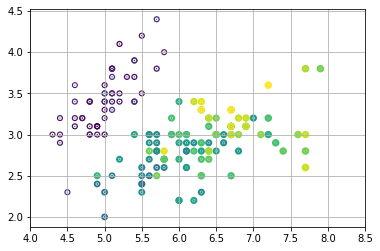

In [18]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'],linewidths=5)
plt.xlim(4,8.5)
plt.grid()

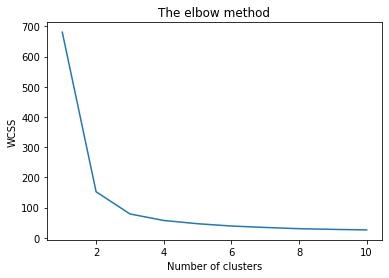

In [19]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From this we choose the number of clusters as 3.

## Training the Data

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
Y_pred = kmeans.fit_predict(X)

In [24]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [31]:
data['cluster_Groups'] = Y_pred
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_Groups
11,4.8,3.4,1.6,0.2,Iris-setosa,1
24,4.8,3.4,1.9,0.2,Iris-setosa,1
141,6.9,3.1,5.1,2.3,Iris-virginica,2
101,5.8,2.7,5.1,1.9,Iris-virginica,0
19,5.1,3.8,1.5,0.3,Iris-setosa,1


In [33]:
# Show Clusters Centroids
kmeans.cluster_centers_ 

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [40]:
Setosa = data[data['cluster_Groups']==0]
Versicolor = data[data['cluster_Groups']==1]
Virginica = data[data['cluster_Groups']==2]

## Visualising the Centroids and Clusters

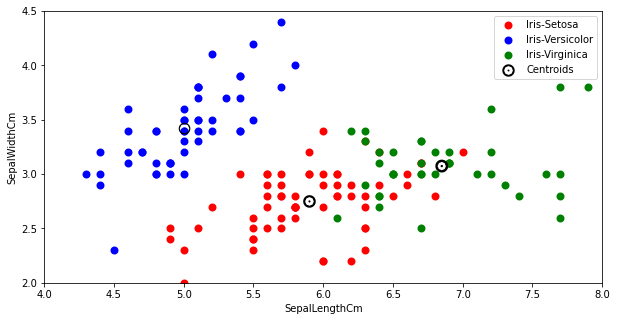

In [55]:
plt.figure(figsize=(10,5))

plt.scatter(Setosa['SepalLengthCm'],Setosa['SepalWidthCm'],linewidths=3.5,label='Iris-Setosa', s = 20,  c = 'red')
plt.scatter(Versicolor['SepalLengthCm'],Versicolor['SepalWidthCm'],linewidths=3.5,label='Iris-Versicolor', s= 20, c = 'blue')
plt.scatter(Virginica['SepalLengthCm'],Virginica['SepalWidthCm'],linewidths=3.5,label='Iris-Virginica', s = 20,  c ='green')


# Plotting the Centroids

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], c = 'black', label = 'Centroids' , linewidth=10.5 )
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.xlim(4,8)
plt.ylim(2,4.5) 
plt.legend()